In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [2]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/949.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/949.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/949.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/949.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/949.2 kB ? eta -:--:--
     ------------------- ---------------- 524.3/949.2 kB 254.3 kB/s eta 0:00:02
     ----------------------------- ------ 786.4/949.2 kB 414.1 kB/s eta 0:00:01
     ------------------------------------ 949.2/949.2 kB 453.2 kB/

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [4]:
# --- Download Stock Data ---
ticker = "AAPL"  # Change to any stock e.g., "RELIANCE.NS"
data = yf.download(ticker, start="2015-01-01", end="2025-01-01")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18488\2884952665.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2015-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


In [5]:
# --- Analysis ---
data['MA50'] = data['Close'].rolling(50).mean()
data['MA200'] = data['Close'].rolling(200).mean()
data['Daily Return'] = data['Close'].pct_change()

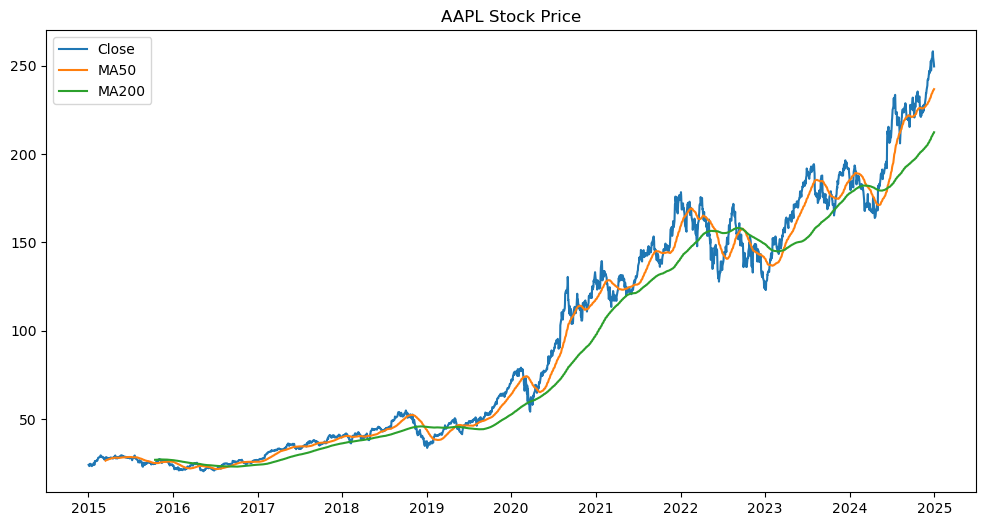

In [6]:
# Plot Closing Price + Moving Averages
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Close')
plt.plot(data['MA50'], label='MA50')
plt.plot(data['MA200'], label='MA200')
plt.title(f'{ticker} Stock Price')
plt.legend()
plt.show()

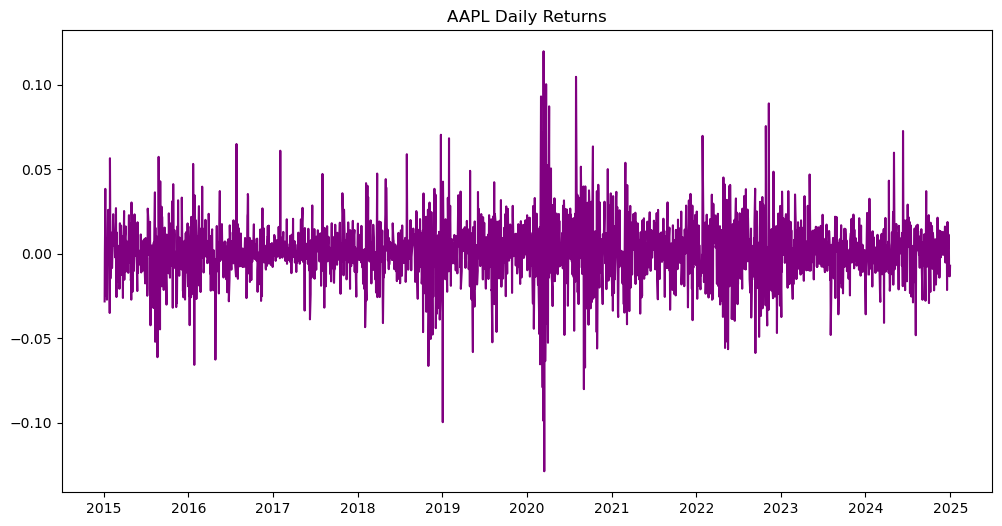

Price         Close Daily Return
Ticker         AAPL             
count   2516.000000  2515.000000
mean      93.949921     0.001088
std       65.504728     0.017929
min       20.624048    -0.128647
25%       35.257094    -0.007326
50%       64.450439     0.001001
75%      150.379646     0.010142
max      258.103729     0.119808


In [7]:

# Plot Daily Returns
plt.figure(figsize=(12,6))
plt.plot(data['Daily Return'], color='purple')
plt.title(f'{ticker} Daily Returns')
plt.show()

print(data[['Close','Daily Return']].describe())

In [8]:
# --- LSTM Prediction ---
close_data = data[['Close']].values
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(close_data)

train_size = int(len(scaled_data)*0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [9]:
# Prepare data
x_train, y_train = [], []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [10]:
# LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=20, batch_size=32)

C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - loss: 0.0055
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0011
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 0.0010
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0011
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 9.3774e-04
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 9.2339e-04
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 8.0589e-04
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 8.3018e-04
Epoch 9/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 8.4042e-04
Epoch 10/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 7.6328e-04
Epoch 11/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 8.1996e-04
Epoch 12/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 7.0102e-04
Epoch 13/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 8.2186e-04
Epoch 14/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 7.4955e-04
Epoch 15/20
61/61 ━━━━━━━━━━━━━

In [11]:
# Test Data
x_test, y_test = [], []
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])
    y_test.append(test_data[i,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = np.array(y_test)

In [12]:
# Predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions.reshape(-1,1))
real_prices = scaler.inverse_transform(y_test.reshape(-1,1))

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


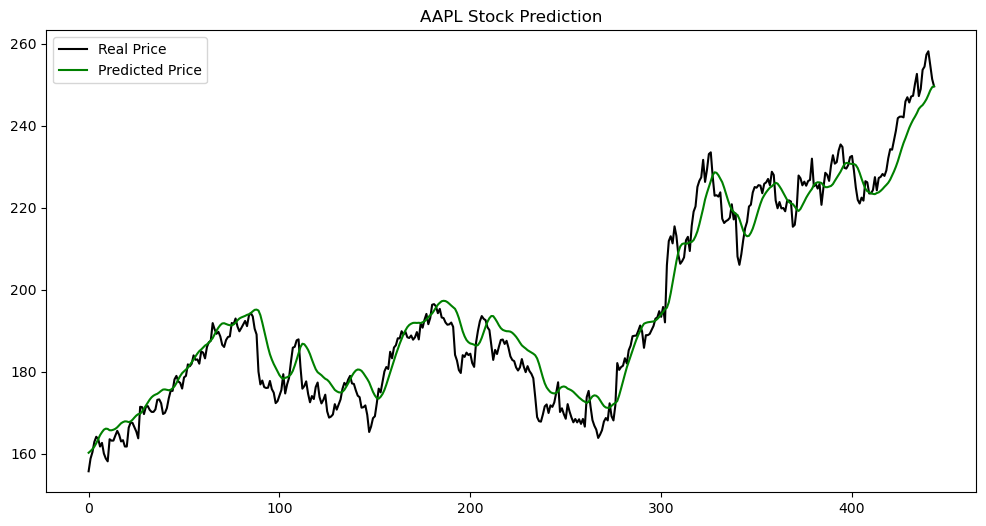

In [13]:
plt.figure(figsize=(12,6))
plt.plot(real_prices, color='black', label='Real Price')
plt.plot(predictions, color='green', label='Predicted Price')
plt.title(f'{ticker} Stock Prediction')
plt.legend()
plt.show()